In [21]:
using Revise, NeuralNetworkAnalysis, JLD2, Plots, BenchmarkTools
const NNA = NeuralNetworkAnalysis

using NeuralNetworkAnalysis: _forward_network

In [3]:
@load "/home/sguadalupe/.julia/dev/NeuralNetworkAnalysis/models/Sherlock-Benchmark-10/b10.jld2" controller

1-element Array{Symbol,1}:
 :controller

In [4]:
@taylorize function benchmark10!(dx, x, p, t)
    x₁, x₂, x₃, x₄, w, u₁, u₂ = x
    dx[1] = x₄ * cos(x₃)
    dx[2] = x₄ * sin(x₃)
    dx[3] = u₂
    dx[4] = u₁ + w
    dx[5] = zero(w)}}(

    return dx
end

In [5]:
X₀ = Hyperrectangle(low=[9.5, -4.5, 2.1, 1.5], high=[9.55, -4.45, 2.11, 1.51])
U₀ = Universe(2)
W₀ = Hyperrectangle(low=[-1e-4], high=[1e-4])
prob = @ivp(x' = benchmark10!(x), dim: 7, x(0) ∈ X₀ × W₀ × U₀)
vars_idx = Dict(:state_vars=>1:4, :input_vars=>[5], :control_vars=>[6, 7]);

In [19]:
plant = ControlledPlant(prob, controller, vars_idx);
alg = TMJets(abs_tol=1e-9, orderT=8, orderQ=1)
solver = ZonotopeBounder()

@time sol = solve(plant, T=0.6, Tsample=0.2, alg_nn=solver, alg=alg)
solz = overapproximate(sol, Zonotope);

  0.855822 seconds (13.39 M allocations: 871.898 MiB, 23.07% gc time)


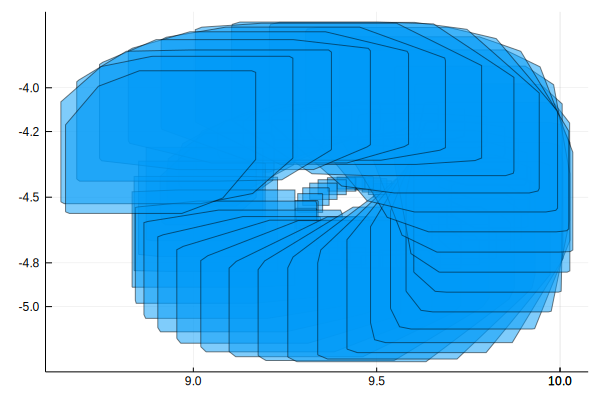

In [20]:
plot(solz, vars=(1, 2))